In [143]:
%matplotlib inline

# import sys
# import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, chi2, f, norm

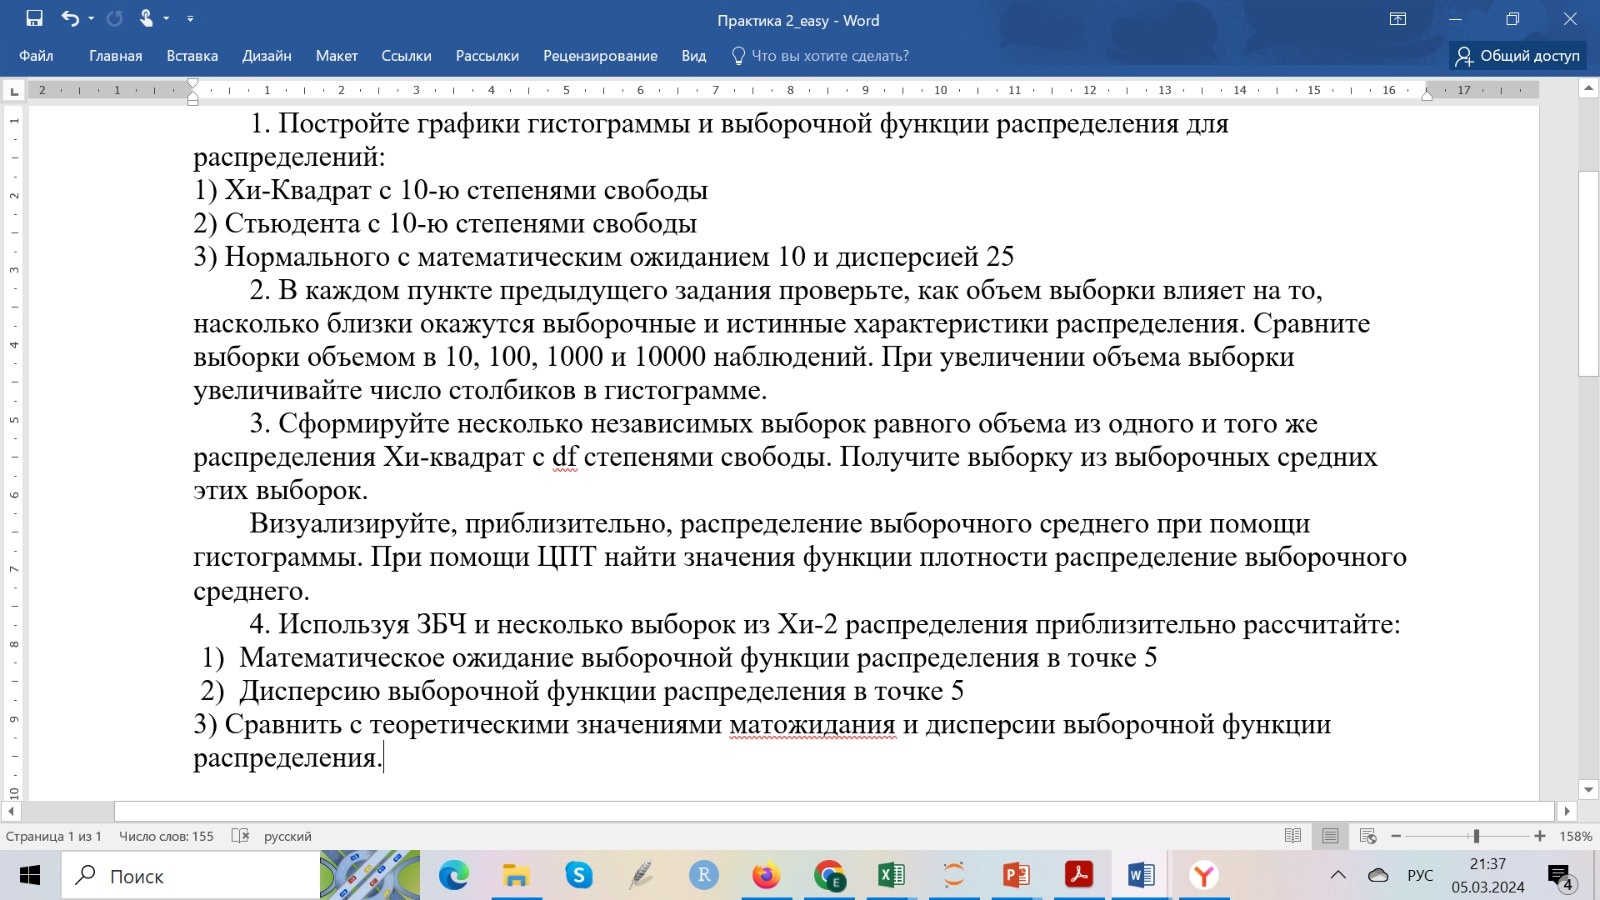

1, 2. Графики гистограммы выборочной функции распределения:

In [144]:
def plot(raspr, n, kwargs, kb=2):
    
    r = raspr.rvs(size=n, **kwargs)

    a = min(r)
    b = max(r)
    plt.hist(r, bins=int(b - a) * kb, density=True)
    
    mean = sum(r)/n
    
    print(f"mean {raspr.mean(**kwargs)}; {mean}")
    print(f"var {raspr.var(**kwargs)}; {sum((r - mean)**2)/(n-1)}")

    x = np.linspace(a, b, 100)

    f = raspr.pdf(x, **kwargs)

    plt.plot(x, f)


    def f_raspr(xs, samples):
        return np.array([sum(int(s <= x) for s in samples) for x in xs])/n

    F = f_raspr(x, r)

    plt.figure(2)
    plt.plot(x, raspr.cdf(x, **kwargs))
    plt.plot(x, F)

    plt.show()
    


mean 10.0; 10.269903449923246
var 20.0; 22.058529479590764


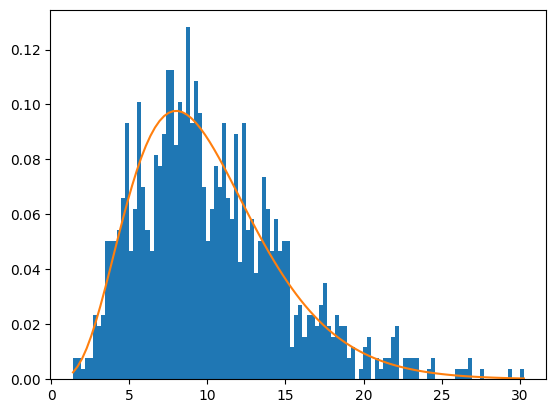

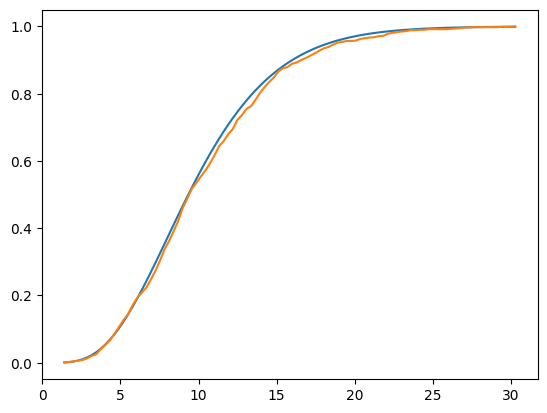

In [165]:
plot(chi2, 1000, { "df": 10 }, kb=4)

mean 0.0; -0.018255914501366596
var 1.25; 1.2926391962341752


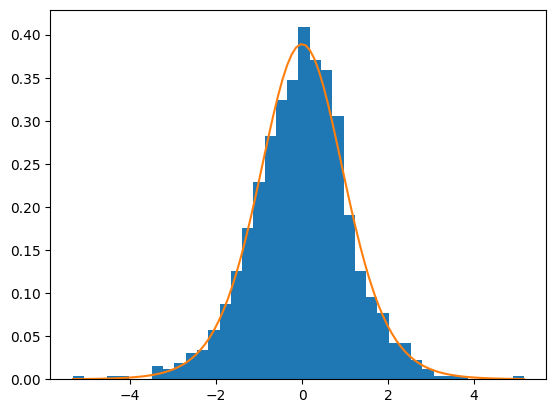

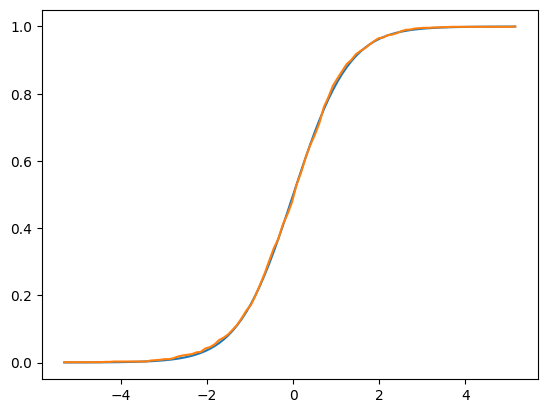

In [146]:
plot(t, 1000, { "df": 10 }, kb=4)

mean 10.0; 10.00220866669373
var 25.0; 23.932517038505612


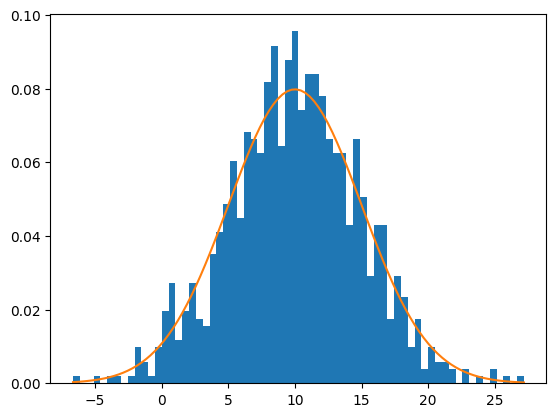

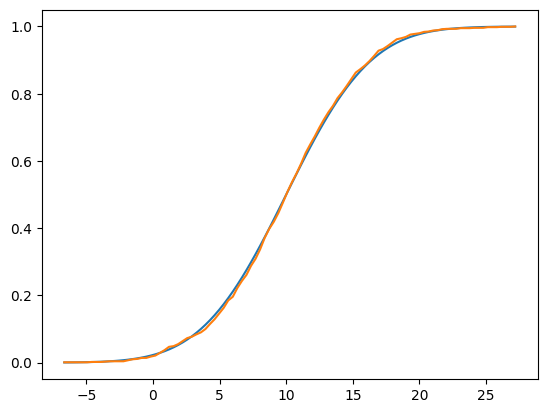

In [147]:
plot(norm, 1000, { "loc": 10, "scale": 5 })

3. Сформируйте несколько выборок Хи-2 с 10 ст

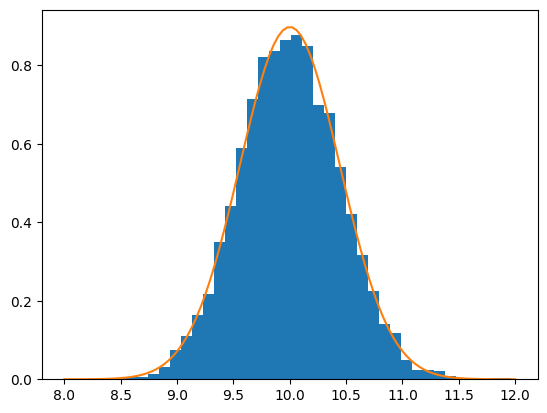

In [148]:
n = 100 # size of 1
nm = 10000
k = 10

r = chi2.rvs(size=[nm, n], df = k)

r_mean = np.array([ sum(ri)/n for ri in r ])

plt.hist(r_mean, bins=40, density=True)

mean = sum(r_mean)/nm
var = 1/(nm - 1) * sum((r_mean - mean)**2)

mean_e = chi2.mean(df=k)
x = np.linspace(mean_e-2, mean_e+2, 100)

plotn = norm.pdf(x, loc = mean, scale = np.sqrt(var))
plt.plot(x, plotn)

plt.show()

4. ЗБЧ Хи-2

In [155]:
n = 1000 # size of 1
nm = 1000
k = 10

r = chi2.rvs(size=[nm, n], df = k)

def f_raspr(xs, samples):
    return np.array([sum(int(s <= x) for s in samples) for x in xs])/n


f_r_many = np.array([f_raspr([5], ri) for ri in r])
f_mean = sum(f_r_many) / nm
print("Mean(F(5)):", f_mean[0], q := chi2.cdf(5, df=k), f_mean[0] - q)

# r_mean = np.array([ sum(ri)/n for ri in r ])
# var_many = np.array([ sum((ri-m)**2)/(n-1) for m, ri in zip(r_mean, r)])
# f_var = sum(var_many) / nm
# print(f_var, chi2.var(df=k))

f_var = f_mean * (1-f_mean)/n
f5 = chi2.cdf(5, df=k)
f_var_e = f5*(1-f5)/n
print("var(F(5)):",  f_var[0], f_var_e, f_var[0]-f_var_e)


Mean(F(5)): 0.10873899999999959 0.10882198108584877 -8.298108584918473e-05
var(F(5)): 9.691482987899967e-05 9.697975751839994e-05 -6.492763940027643e-08
